Chapter 16.4: Exercise

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
from keras import Input
import keras




In [43]:
train_root =pathlib.Path("C:/Users/jackr/OneDrive - UCB-O365/Documents/!prjs/snakeCharming/code/textbook/ai-with-python/Part3/convolutionalNeuralNet/data/archive/fruits-360_dataset/fruits-360/Training")
test_root = pathlib.Path("C:/Users/jackr/OneDrive - UCB-O365/Documents/!prjs/snakeCharming/code/textbook/ai-with-python/Part3/convolutionalNeuralNet/data/archive/fruits-360_dataset/fruits-360/Test")

In [44]:
batch_size = 10

(100, 100, 3)
[[[253 255 250]
  [255 255 251]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[251 255 252]
  [253 255 252]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[249 255 253]
  [251 255 254]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


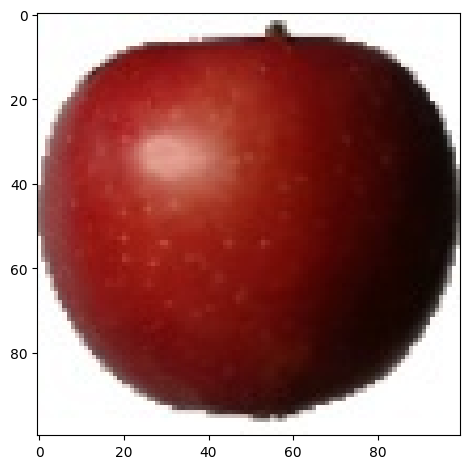

In [45]:
from skimage import io
image = io.imread("C:/Users/jackr/OneDrive - UCB-O365/Documents/!prjs/snakeCharming/code/textbook/ai-with-python/Part3/convolutionalNeuralNet/data/archive/fruits-360_dataset/fruits-360/Training/Apple Braeburn/101_100.jpg")
print(image.shape)
print(image)
io.imshow(image)

In [46]:
generator = ImageDataGenerator()
train_data = generator.flow_from_directory(directory=train_root, target_size=(100, 100), batch_size=batch_size)
test_data = generator.flow_from_directory(directory=test_root, target_size=(100, 100), batch_size=batch_size)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [47]:
num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)

131


In [48]:
model = Sequential()
model.add(Input(shape=(100, 100, 3)))

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(num_classes, activation='softmax'))


In [49]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizers.Adam(), metrics=['accuracy'])
model.fit(train_data, batch_size = batch_size, epochs=2)


Epoch 1/2


c:\Users\jackr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6770/6770 ━━━━━━━━━━━━━━━━━━━━ 173s 24ms/step - accuracy: 0.5077 - loss: 2.0179
Epoch 2/2
6770/6770 ━━━━━━━━━━━━━━━━━━━━ 162s 24ms/step - accuracy: 0.8694 - loss: 0.4784
